<a href="https://colab.research.google.com/github/justaplan/sales_analysis_tutorial/blob/master/sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive" , force_remount=True)

%cd "/content/gdrive/My Drive/Python/List of CSV"

Mounted at /content/gdrive
/content/gdrive/My Drive/Python/List of CSV


In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**<h1>Section A. Data Cleaning</h1>**

<h3>1. Drop all NaN and reset Index</h3>

In [4]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<h3>2. Remove Non Date Value in the Date Series</h3>

In [5]:
df = df[df["Order Date"] != "Order Date"]

<h3>3. Convert columns to correct type</h3>

In [6]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"]) # To integer
df["Price Each"] = pd.to_numeric(df["Price Each"]) # To float

**<h1>Section B. Data Augmentation</h1>**

<h3>1. Add Month Column</h3>

In [7]:
## 1st Method - Convert to the DateTime Object
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")

## 2nd Method - Convert to str and gather the month fron the string
# df["Month"] = df["Order Date"].str[0:2]

df["Month"] = pd.DatetimeIndex(df["Order Date"]).month # or df["Order Date"].dt.month
df["Month"] = df["Month"].astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


<h3>2. Add Sales Column</h3>

In [8]:
df["Sale"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


**<h1>Section C. Analysis and Chart<h1>**

<h3>Question 1: What is the best month for sales? How much was earned that month?</h3>

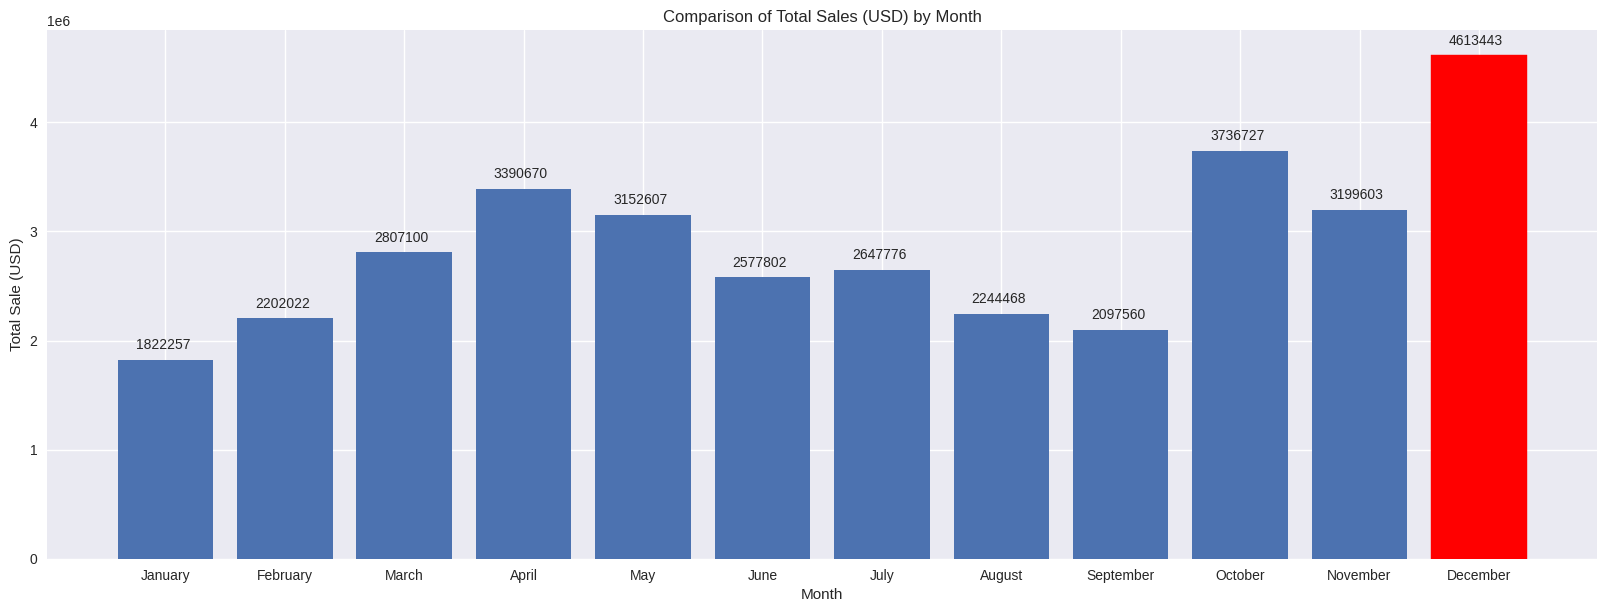

In [38]:
import calendar
months = []
for i in range(1,13):
  months.append(calendar.month_name[i])

total_sale = df.groupby("Month").sum()["Sale"].tolist()

x_indexes = np.arange(len(months))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
sales_bar = plt.bar(x_indexes,total_sale)
sales_bar[-1].set_color("red")

## Chart Value Plotting
for x,y in zip(x_indexes,total_sale):
  plt.text(x - 0.25,y + 100000,s=round(y))

## Chart Title and Labelling
plt.title("Comparison of Total Sales (USD) by Month")
plt.xlabel("Month")
plt.ylabel("Total Sale (USD)")
plt.xticks(x_indexes,months)

plt.show()

<h3>Question 2: What city has highest sale?</h3>

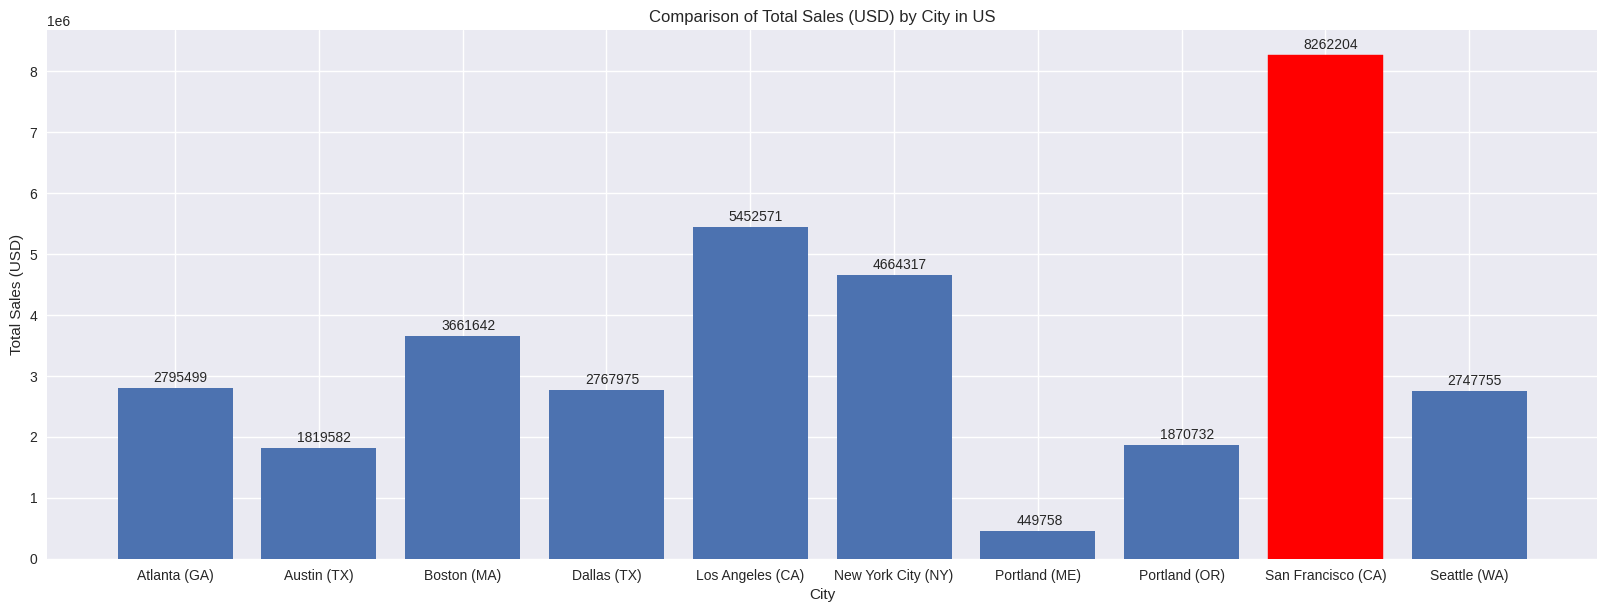

In [10]:
## Keith Galli way
# def get_city(address):
#   return address.split(",")[1].strip()

# def get_state(address):
#   return address.split(",")[2][:3].strip()

# df["City"] = df["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

## Nicky Way
df["City"] = df["Purchase Address"].apply(lambda x : x.split(",")[1].strip()) + " " +"(" + df["Purchase Address"].apply(lambda x : x.split(",")[2][:3].strip()) + ")"

city_name = df.groupby("City").sum().index.tolist()
## city_name = [city for city, df in df.groupby("City")] Alternative way
city_sales = df.groupby("City").sum()["Sale"].tolist()

x_indexes = np.arange(len(city_name))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
city_sales_bar = plt.bar(x_indexes,city_sales)
city_sales_bar[-2].set_color("red")

for x,y in zip(x_indexes,city_sales):
  plt.text(x - 0.15,y+100000,s=round(y))

## Chart Title and Label
plt.title("Comparison of Total Sales (USD) by City in US")

plt.xlabel("City")
plt.ylabel("Total Sales (USD)")

plt.xticks(x_indexes,city_name)


plt.show()

<h3>Question 3: What time should we display advertisements to maximize likelihood of customer's buying product</h3>

In [11]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

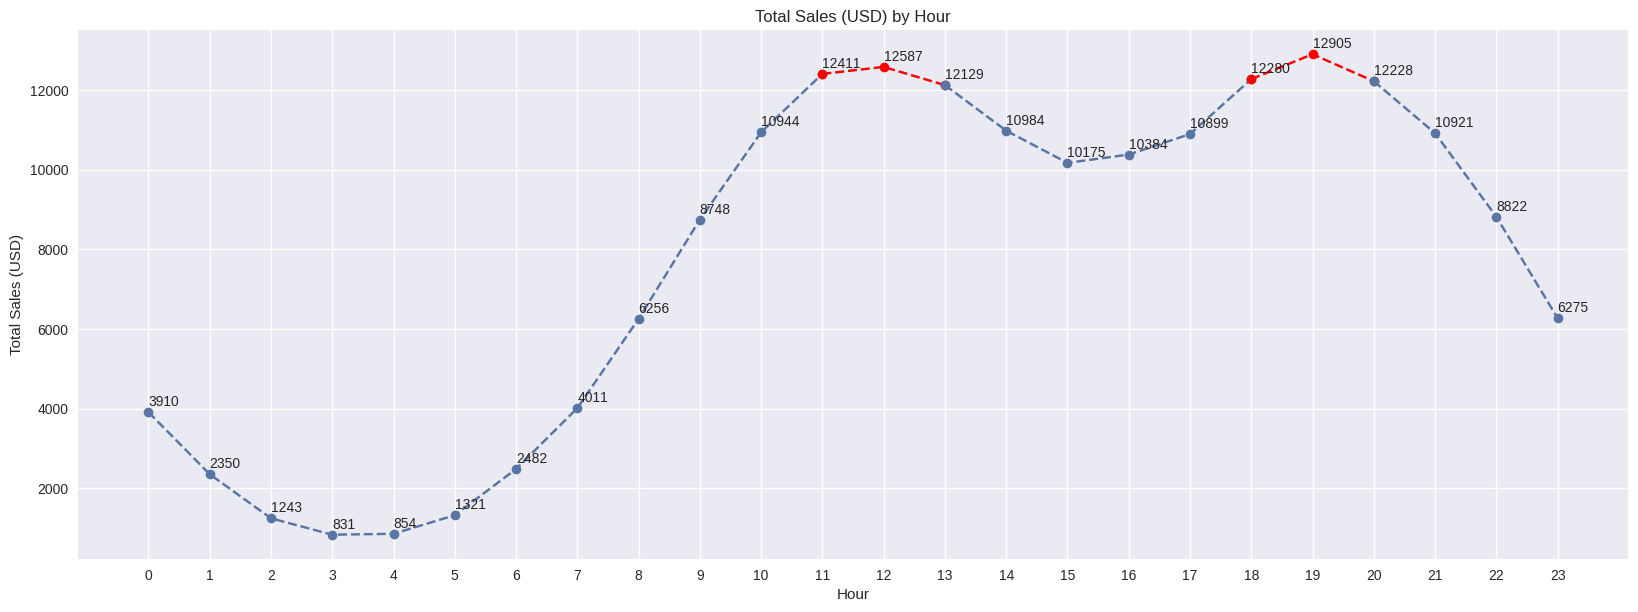

In [12]:
hour = [hour for hour, df in df.groupby("Hour")]
## hour2 = df.groupby("Hour").sum().index.tolist() Alternative way
sales_hour = df.groupby("Hour").count()["Order ID"].tolist()

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
plt.plot(hour[:12],sales_hour[:12],marker="o",linestyle="--",color="#5975A4")
plt.plot(hour[11:14],sales_hour[11:14],marker="o",linestyle="--" , color="r")
plt.plot(hour[13:19],sales_hour[13:19],marker="o",linestyle="--",color="#5975A4")
plt.plot(hour[18:21],sales_hour[18:21],marker="o",linestyle="--", color="r")
plt.plot(hour[20:],sales_hour[20:],marker="o",linestyle="--",color="#5975A4")



for x,y in zip(hour, sales_hour):
  plt.text(x,y+150,s=y)

## Chart Title and Labelling
plt.title("Total Sales (USD) by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Sales (USD)")
plt.xticks(hour)

plt.show()

## Recommend to put on advertisement on 11am and 6pm to boost the sales

<h4>Question 4: What products are most often sold together (Method 1)</h4>

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [33]:
df_duplicated = df[df["Order ID"].duplicated(keep=False)]
df_duplicated["Grouped"] = df_duplicated.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df_duplicated = df_duplicated[["Order ID","Grouped"]].drop_duplicates()

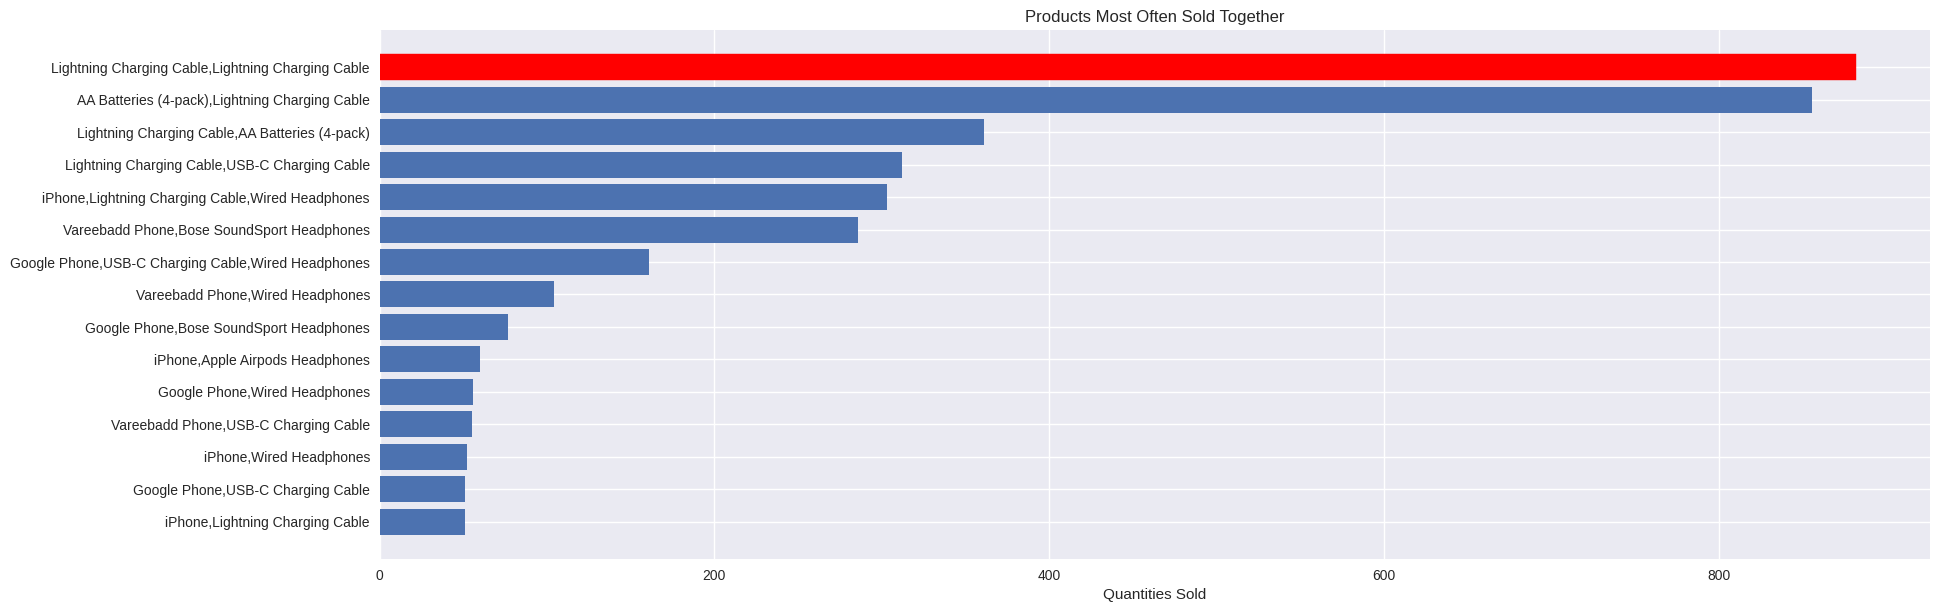

In [15]:
x = df_duplicated["Grouped"].value_counts().nlargest(15).index.tolist()
y = df_duplicated["Grouped"].value_counts().nlargest(15).tolist()

x_indexes = np.arange(len(x))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

bar = plt.barh(x_indexes,y[::-1])
bar[-1].set_color("red")

plt.title("Products Most Often Sold Together")
plt.yticks(x_indexes,x)
plt.xlabel("Quantities Sold")

plt.show()

<h4>Question 4: What products are most often sold together (Method 2)</h4>

In [34]:
df_duplicated = df[df["Order ID"].duplicated(keep=False)]
df_duplicated["Grouped"] = df_duplicated.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df_duplicated = df_duplicated[["Order ID","Grouped"]].drop_duplicates()

In [39]:
## Cannot run as google colab doesnt have intertools
# from intertools import combinations
# from collection import Counter

# count = Counter()

# for row in df["grouped"]:
#   row_list = row.split(",")
#   count.update(Counter(combinations(row_list,2)))

# count.most_common(10)


<h4>Question 5: What products sold the most and the quantity sold(Method 1 with Bar Histogram)</h4>

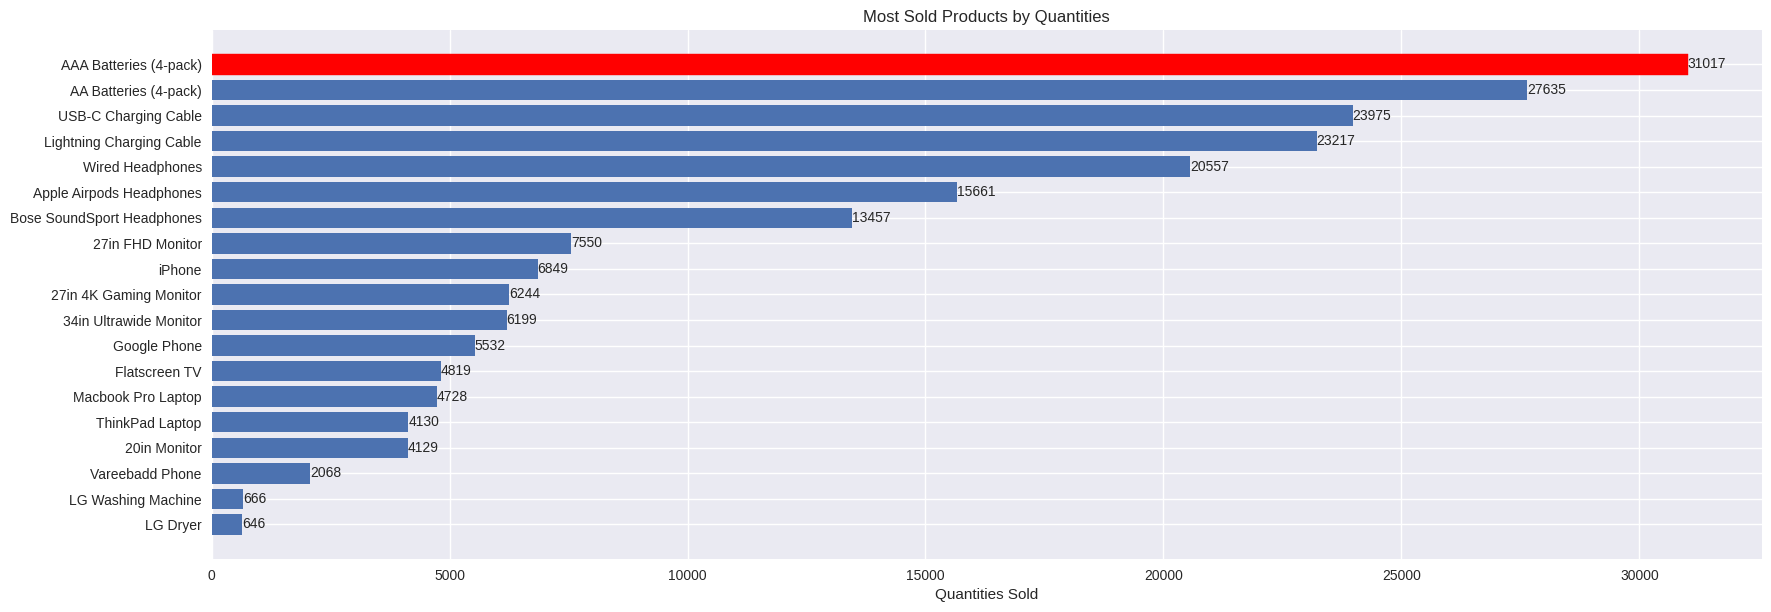

In [16]:
products = df.groupby("Product").sum()["Quantity Ordered"].sort_values().index.tolist()
## products_2 = [product for product, df in df.groupby("Product")] Method 2 but diffficulet sort values
quantity_ordered = df.groupby("Product").sum()["Quantity Ordered"].sort_values().tolist()

x_indexes = np.arange(len(products))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
product_bar = plt.barh(x_indexes,quantity_ordered)
product_bar[-1].set_color("red") 

## Chart Value Plotting
for x,y in zip(quantity_ordered,x_indexes):
  plt.text(x,y-0.15,s=x)

## Chart Title and Labelling
plt.title("Most Sold Products by Quantities")
plt.yticks(x_indexes,products)
plt.xlabel("Quantities Sold")

plt.show()


<h4>Question 5: What products sold the most and the quantity sold(Method 2 with Bar & Line Chart )</h4>

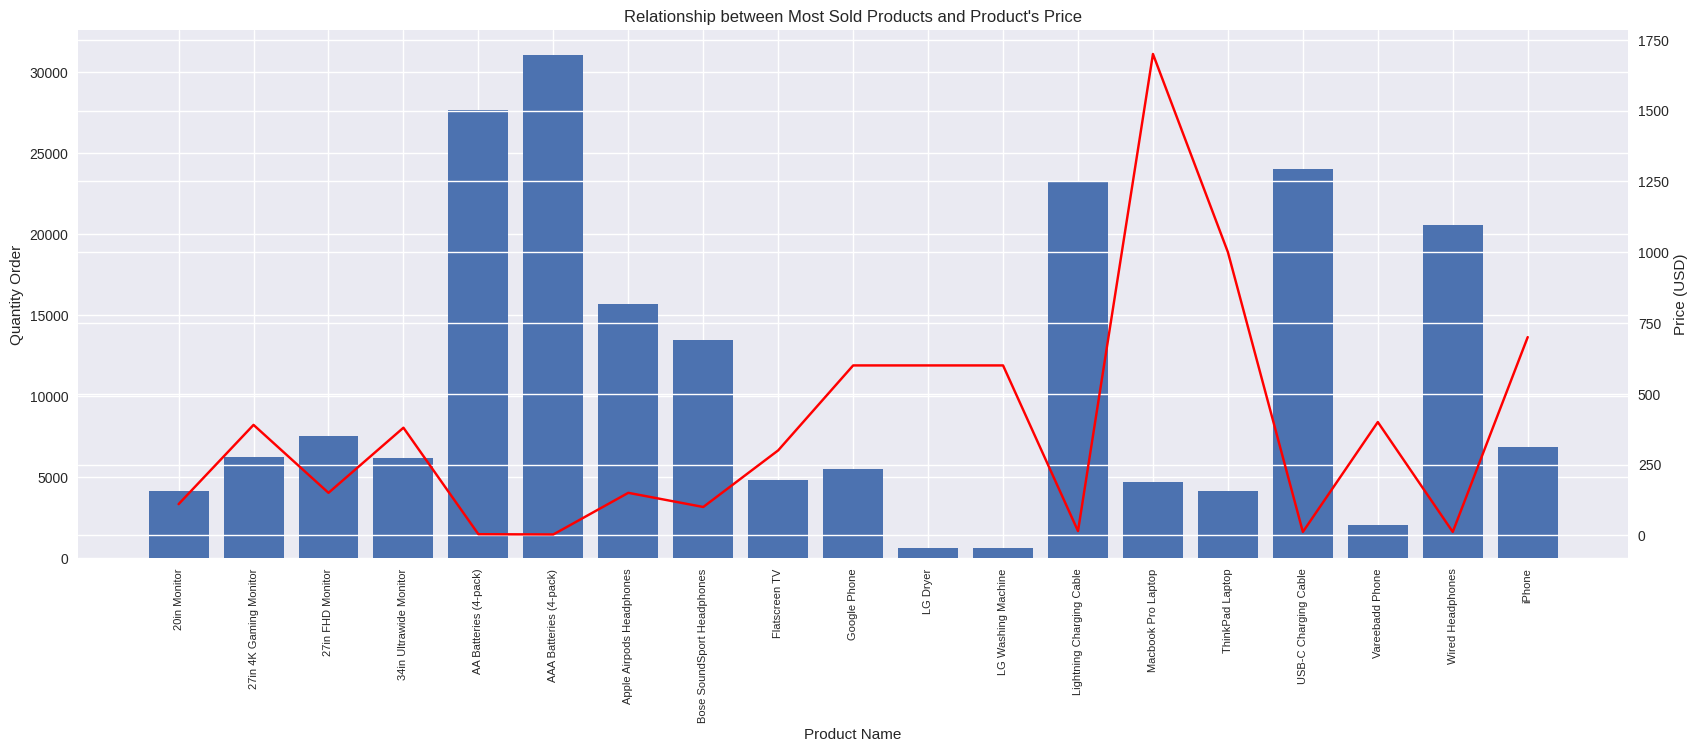

In [18]:
products = [product for product, df in df.groupby("Product")] # x
quantity_ordered = df.groupby("Product").sum()["Quantity Ordered"] #y1
product_price = df.groupby("Product").median()["Price Each"] #y2

fig, ax1 = plt.subplots(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,product_price,color="red")


plt.title("Relationship between Most Sold Products and Product's Price")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Order")
ax2.set_ylabel("Price (USD)")
ax1.set_xticklabels(products,rotation="vertical",size=8)


plt.show()